# Python Basics and Model Optimization Fundamentals

Welcome to your first homework. This exercise will introduce you to key Python functions and concepts, even if you've used Python before. This homework will guide the development of the building blocks for your own neural network model.

In this homework, you will
- Work with Python and Numpy to better understand matrix operations, dimensions, and interactions.
- You will also learn how to compute function parameter gradients and update these parameters to create a classification model.

**Instructions:**
- Use Python3 for all exercises.
- Install Numpy, MatplotLib, Pillow (pip3 install numpy, matplotlib, pillow)
- Install PyTorch and its components. This a little more elaborate because it is system dependent. Make sure you install torchvision for datasets. You will not use PyTorch in this homework. We are using the Torch library for easy access to datasets.
- Run all test cells for a superficial test of your functions. These tests are designed to help you with your assignment but do not rely on them for complete correctness. Your code will be assessed on a separate more comprehensive test set.

**Note on Numpy:**
- Numpy is a primary package for scientific computing in Python, and it's maintained by a large community (www.numpy.org). In this exercise, you will learn various crucial numpy functions such as `np.exp`, `np.log`, and `np.reshape`. It's essential to understand how to use these functions for your deep learning journey.

**Note on Jupyter Notebooks:**
- Remember to re-run cells from the start when restarting kernel.
- You can run a cell with the keyboard shortcut shift+enter


In [705]:
# version 1.0

## 1. Python Basics (20 Pts)


### Import needed Python libraries and functions [Do not Change]

In [706]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.datasets as datasets
import copy
from PIL import Image
from PIL import ImageEnhance
from PIL import ImageChops

If  the cell above executed without issues, you can continue. Otherwise, check your Python, Numpy, PyTorch, Matplotlib, and Pillow installations.

### 1.0. Quick Python and PyTorch test

In [707]:

# YOUR CODE STARTS HERE
test= "Python is working"
print(test)

test = torch.rand(5, 3)
if(test is not None):
    print("Torch is working")
# YOUR CODE ENDS HERE

Python is working
Torch is working


### 1.1 - Building sigmoid function with Numpy with np.exp()  (Points 3)

Build a function that returns the sigmoid of a numpy real vector or matrix $x$.

**Reminder**:
$sigmoid(x) = \frac{1}{1+e^{-x}}$

This function is sometimes also known as the logistic function. It is a non-linear function used not only in Machine Learning (Logistic Regression), but also in Deep Learning.

In [708]:
def sigmoid(x):
    """
    Compute sigmoid of x.

    Arguments:
    x -- A scalar or numpy vector or matrix

    Return:
    s -- sigmoid(x)
    """

    # YOUR CODE STARTS HERE
    s = 1 / (1 + np.exp(-x))
    # YOUR CODE ENDS HERE

    return s

In [709]:
# Create numpy array
a = np.array([1])

print("sigmoid([1]) = " + str(sigmoid(a)))

if(sigmoid(a)[0] ==  0.7310585786300049):
    print("Test passed")

sigmoid([1]) = [0.73105858]
Test passed


### 1.2- Build Sigmoid Gradient (Points 3)
Computing gradients is an important step in backpropagation. In this exercise, you will compute the gradient (i.e., derivative) of the sigmoid function.

**Recall**
$$sigmoid\_derivative(x) = \sigma'(x) = \sigma(x) (1 - \sigma(x))\tag{2}$$

In [710]:
def sigmoid_gradient(x):
    """
    Compute the gradient (also called the slope or derivative) of the sigmoid function with respect to its input x.

    Arguments:
    x -- A scalar or numpy array

    Return:
    ds -- Your computed gradient.
    """

    # YOUR CODE STARTS HERE
    s = sigmoid(x)
    ds = s * (1 - s)
    # YOUR CODE ENDS HERE

    return ds

In [711]:
a = np.array([1, 2, 3])
print ("sigmoid_gradient(a) = " + str(sigmoid_gradient(a)))

if (np.array_equiv(np.round(sigmoid_gradient(a),8), np.array([0.19661193, 0.10499359, 0.04517666]))) :
    print("Test passed")

sigmoid_gradient(a) = [0.19661193 0.10499359 0.04517666]
Test passed


### 1.3- Vectorize Image (Points 4)

Implement `image2vector()` that takes an input of shape (length, height, depth) and returns a vector of shape (length\*height\*depth, 1).
- Don't hardcode the dimensions of image as a constant. Instead look up the quantities you need with `image.shape[0]`, etc.

In [712]:
def image2vector(image):
    """
    Argument:
    image -- a numpy array of shape (length, height, depth)

    Returns:
    v -- a vector of shape (length*height*depth, 1)
    """

    # YOUR CODE STARTS HERE
    length, height, depth = image.shape

    # Reshape the image into a vector
    v = image.reshape((length * height * depth, 1))
    # YOUR CODE ENDS HERE

    return v

In [713]:
# Test
a_image = np.array([[[ 0.67826139,  0.29380381],
                     [ 0.90714982,  0.52835647],
                     [ 0.4215251 ,  0.45017551]],

                   [[ 0.92814219,  0.96677647],
                    [ 0.85304703,  0.52351845],
                    [ 0.19981397,  0.27417313]],

                   [[ 0.60659855,  0.00533165],
                    [ 0.10820313,  0.49978937],
                    [ 0.34144279,  0.94630077]]])

vec_arr = image2vector(a_image)
if (vec_arr[0]==0.67826139) & (vec_arr[6]==0.92814219) & (vec_arr[17]==0.94630077) & (vec_arr.shape[0]==18):
    print("Test passed")

Test passed


### 1.4 Implement the L1 and L2 loss functions (Points 5)

**Reminder**:
- The loss is used to evaluate the performance of your model. The bigger your loss is, the more different your predictions ($ \hat{y} $) are from the true values ($y$). In deep learning, you use optimization algorithms like Gradient Descent to train your model and to minimize the cost.
- L1 loss is defined as:
$$\begin{align*} & L_1(\hat{y}, y) = \sum_{i=0}^{m-1}|y^{(i)} - \hat{y}^{(i)}| \end{align*}\tag{6}$$
- L2 loss is defined as $$\begin{align*} & L_2(\hat{y},y) = \sum_{i=0}^{m-1}(y^{(i)} - \hat{y}^{(i)})^2 \end{align*}\tag{7}$$

In [714]:
def L1(yhat, y):
    """
    Arguments:
    yhat -- vector of size m (predicted labels)
    y -- vector of size m (true labels)

    Returns:
    loss -- the value of the L1 loss function defined above
    """

    #(≈ 1 line of code)
    # loss =
    # YOUR CODE STARTS HERE
    loss = np.sum(np.abs(y - yhat))
    # YOUR CODE ENDS HERE

    return loss

def L2(yhat, y):
    """
    Arguments:
    yhat -- vector of size m (predicted labels)
    y -- vector of size m (true labels)

    Returns:
    loss -- the value of the L2 loss function defined above
    """

    #(≈ 1 line of code)
    # loss = ...
    # YOUR CODE STARTS HERE
    loss = np.sum(np.square(y - yhat))
    # YOUR CODE ENDS HERE

    return loss

In [715]:
yhat = np.array([.9, 0.2, 0.1, .4, .9])
y = np.array([1, 0, 0, 1, 1])
if (round(L1(yhat, y),5)==1.10000) & (round(L2(yhat, y),5)==0.43000):
    print("Test passed")

Test passed


### 1.5 - Normalizing rows (Points 5)

Another common technique we use in Machine Learning and Deep Learning is to normalize our data. It often leads to a better performance because gradient descent converges faster after normalization. Here, by normalization we mean changing x to $ \frac{x}{\| x\|} $ (dividing each row vector of x by its norm).

For example, if
$$x = \begin{bmatrix}
        0 & 3 & 4 \\
        2 & 6 & 4 \\
\end{bmatrix}\tag{3}$$
then
$$\| x\| = \text{np.linalg.norm(x, axis=1, keepdims=True)} = \begin{bmatrix}
    5 \\
    \sqrt{56} \\
\end{bmatrix}\tag{4} $$
and
$$ x\_normalized = \frac{x}{\| x\|} = \begin{bmatrix}
    0 & \frac{3}{5} & \frac{4}{5} \\
    \frac{2}{\sqrt{56}} & \frac{6}{\sqrt{56}} & \frac{4}{\sqrt{56}} \\
\end{bmatrix}\tag{5}$$


With `keepdims=True` the result will broadcast correctly against the original x.

`axis=1` means you are going to get the norm in a row-wise manner. If you need the norm in a column-wise way, you would need to set `axis=0`.

numpy.linalg.norm has another parameter `ord` where we specify the type of normalization to be done (in the exercise below you'll do 2-norm). To get familiar with the types of normalization you can visit [numpy.linalg.norm](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html)

\
\
**Implement normalize_rows**

Implement normalizeRows() to normalize the rows of a matrix. After applying this function to an input matrix x, each row of x should be a vector of unit length (meaning length 1).

In [716]:
def normalize_rows(x):
    """
    Implement a function that normalizes each row of the matrix x (to have unit length).

    Argument:
    x -- A numpy matrix of shape (n, m)

    Returns:
    x -- The normalized (by row) numpy matrix.
    """

    # YOUR CODE STARTS HERE
    x_norm = np.linalg.norm(x, axis=1, keepdims=True)
    x_normalized = x / x_norm

    # YOUR CODE ENDS HERE

    return x_normalized

In [717]:
x = np.array([[0., 3., 7.],
              [1., 5., 4.]])
x_norm = np.round(normalize_rows(x), 5)
x_norm_true = np.round(np.array([[0., 0.3939193, 0.91914503],
                        [0.15430335, 0.77151675, 0.6172134 ]]), 5)
print("normalizeRows(x) = " + str(x_norm))

if((x_norm_true==x_norm).all()):
    print("Test Passed")

normalizeRows(x) = [[0.      0.39392 0.91915]
 [0.1543  0.77152 0.61721]]
Test Passed


## 2. Logistic Regression Model with NN Mindset (Points 50)

You will build a binary classification model using the logistic regression technique discussed in class. The model will discriminate the handwritten numbers zero and one from the MNIST dataset.

**Instructions**
- Download the MNIST dataset using the provided functions.
    - You will need to install PyTorch and Torchvision for the data loading functions to work.
    - The data loader functions will load the dataset to your local jupyter notebook root folder.
    - Make sure you have write permissions.
- You will build the following functions
    - Sigmoid function (Completed above)
    - Sigmoid derivative (Completed above)
    - Parameter initialization
    - Cost and gradient computations
    - Optimization
    - Model (integrates all the functions above)
    - Use the learned parameters to predict labels on test data
- Experiment with learning rates
- Analyze results

### 2.0 Load dataset [DO NOT CHANGE]

This code uses PyTorch torch and torchvision libraries to download the dataset from the web to your computer and then load the train and testing datasets to memory in the desired shape. Please do not change this code in anyway, because it can break the code  generated by the instructor.

It will be good to look into a PyTorch tutorial to learn more about these functions.
See link : https://pytorch.org/tutorials/beginner/basics/intro.html

The cell below will display one image example to ensure proper function of the code.

Label y = [0]. This is handwritten "0 - zero" picture.


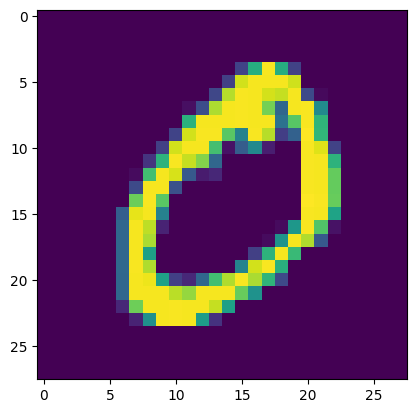

In [718]:
# DO NOT CHANGE CODE BELOW
#

# Download dataset from PyTorch website
data = datasets.MNIST(root='./data', train=True, download=True, transform=None)

# Load train data to memory
loader = torch.utils.data.DataLoader(data, batch_size=1)
data_set_x_orig = (loader.dataset.data).numpy()
data_set_y = (loader.dataset.targets).numpy().reshape(-1,1).T
classes = loader.dataset.classes

# Leave 1s and 0s on dataset
I1 = (data_set_y < 2)
data_set_x_orig = data_set_x_orig[I1.reshape(-1), :, :]
data_set_y = (data_set_y[I1].reshape(-1,1).T)


#Let's split training set in training and test set
mm = int(0.5*data_set_x_orig.shape[0])
train_set_x_orig = data_set_x_orig[:mm, :, :]
train_set_y = data_set_y[:,:mm]
test_set_x_orig = data_set_x_orig[mm+1:, :, :]
test_set_y = data_set_y[:,mm+1:]


#Display example of picture
index = 0
x = train_set_x_orig[index]
y = train_set_y[:, index]
c = classes[int(y.item())]
plt.imshow(train_set_x_orig[index])
print ("Label y = " + str(y) + ". This is handwritten \"" + c +  "\" picture.")

#
# DO NOT CHANGE CODE ABOVE

### 2.1 Print dimensions of data arrays (Points 3)
Find the values for:
- m_train (number of training examples)
- m_test (number of test examples)
- num_px (= height = width of a training image)

Remember that `train_set_x_orig` is a numpy-array of shape (m_train, num_px, num_px, depth). For instance, you can access `m_train` by writing `train_set_x_orig.shape[0]`. For this experiment, we are working with grayscale images. So, depth is 1.

In [719]:
#################################
# Data arrays
#   - train_set_x_orig
#   - train_set_y
#   - test_set_x_orig
#   - test_set_y
#################################

# YOUR CODE STARTS HERE
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
# YOUR CODE ENDS HERE

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 1)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 6332
Number of testing examples: m_test = 6332
Height/Width of each image: num_px = 28
Each image is of size: (28, 28, 1)
train_set_x shape: (6332, 28, 28)
train_set_y shape: (1, 6332)
test_set_x shape: (6332, 28, 28)
test_set_y shape: (1, 6332)


Before proceeding ensure:
- Number of training samples: 6332
- Number of test samples: 6332
- Size of images: 28 x 28 x 1

### 2.2 Flatten input images (matrices) (Points 2)
As discussed in class, we need to flatten input matrices before ingesting them into our model. In this exercise you will perform that operation.

Reshape the training and test data sets so that images of size (num_px, num_px, 1) are flattened into single vectors of shape (num\_px $*$ num\_px $*$ 1, 1).

A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b$*$c$*$d, a) is to use:
```python
X_flatten = X.reshape(X.shape[0], -1).T      # X.T is the transpose of X
```

In [720]:
# Reshape the training and test examples
# train_set_x_flatten = ...
# test_set_x_flatten = ...

# YOUR CODE STARTS HERE
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
# YOUR CODE ENDS HERE

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (784, 6332)
train_set_y shape: (1, 6332)
test_set_x_flatten shape: (784, 6332)
test_set_y shape: (1, 6332)


**Expected Output**:

<table style="width:35%">
  <tr>
    <td>train_set_x_flatten shape</td>
    <td> (784, 6332) </td>
  </tr>
  <tr>
    <td>train_set_y shape</td>
    <td>(1, 6332)</td>
  </tr>
  <tr>
    <td>test_set_x_flatten shape</td>
    <td>(784, 6332)</td>
  </tr>
  <tr>
    <td>test_set_y shape</td>
    <td>(1, 6332)</td>
  </tr>
</table>

### 2.3 Standardize input values (Points 3)

A critical step in machine learning is to standardize the inputs. This helps with quick convergence of the model's training cost.

RGB images (as the input in this dataset) have pixel integer values from 0-255. We will normalize these values to the floating point range of 0.-1.

Write code to standardize the flatten dataset from 0-255 to 0.-1 (float).

We will later learn in the class other techniques to standardize our datasets.

In [721]:
#####
# Standardize train_set_x_flatten and test_set_x_flatten into...
# train_set_x = ...
# test_set_x = ...

# YOUR CODE STARTS HERE
train_set_x = train_set_x_flatten / 255.0
test_set_x = test_set_x_flatten / 255.0
# YOUR CODE ENDS HERE

### 2.4 Sigmoid function and its derivative
We already implemented the sigmoid function and its derivative in part 1 of this homework.

Below is a simple test to ensure the functions are defined and working properly. Guess what, we only need the sigmoid function to update our parameters.

In [722]:
# Create numpy array
a = np.round(np.array([0,2]), 5)
b = np.round(sigmoid(a), 5)

print("sigmoid([0,2]) = " + str(b))

if((b==np.array([0.5, 0.8808])).all()):
    print("Test passed")

sigmoid([0,2]) = [0.5    0.8808]
Test passed


### 2.5 Initialize parameters function (Points 2)
Implement parameter initialization in the cell below. You have to initialize w as a vector of zeros. If you don't know what numpy function to use, look up np.zeros() in the Numpy library's documentation.

In [723]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.

    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)

    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias) of type float
    """

    # (≈ 2 lines of code)
    # w = ...
    # b = ...
    # YOUR CODE STARTS HERE
    w = np.zeros((dim, 1))
    b = 0.0
    # YOUR CODE ENDS HERE

    return w, b

In [724]:
dim = 2
w, b = initialize_with_zeros(dim)

assert type(b) == float
print ("w = " + str(w))
print ("b = " + str(b))

if((w==np.array([0., 0.])).all()):
    print("Test passed")

w = [[0.]
 [0.]]
b = 0.0
Test passed


### 2.6 - Forward and Backward propagation (Points 20)

Now that your parameters are initialized, you can do the "forward" and "backward" propagation steps for learning the parameters.

Implement a function `propagate()` that computes the cost function and its gradient.

**Hints**:

Forward Propagation:
- Input X, w, and b. The parameters w and b initialized with some arbitrary vector or number (e.g., vector of zeros or a zero).
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$

Here are the two formulas you will be using:

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [725]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 1, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 1, number of examples)
    Y -- true "label" vector (containing 0 if image number is zero, 1 if image number is one) of size (1, number of examples)

    Return:
    grads -- dictionary containing the gradients of the weights and bias
            (dw -- gradient of the loss with respect to w, thus same shape as w)
            (db -- gradient of the loss with respect to b, thus same shape as b)
    cost -- negative log-likelihood cost for logistic regression

    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """

    m = float(X.shape[1])

    # FORWARD PROPAGATION (FROM X TO COST)
    # compute activation
    # A = ...
    # compute cost by using np.dot to perform multiplication.
    # And don't use loops for the sum.
    # cost = ...
    # YOUR CODE STARTS HERE
    A = sigmoid(np.dot(w.T, X) + b)
    cost = -(1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    # YOUR CODE ENDS HERE

    # BACKWARD PROPAGATION (TO FIND GRAD)
    # dw = ...
    # db = ...
    # YOUR CODE STARTS HERE
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)
    # YOUR CODE ENDS HERE
    cost = np.squeeze(np.array(cost))


    grads = {"dw": dw,
             "db": db}

    return grads, cost

In [726]:
w =  np.array([[1.], [2]])
b = 1.5
X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
Y = np.array([[1, 1, 0]])
grads, cost = propagate(w, b, X, Y)

dw = np.round(grads["dw"],5)
db = np.round(grads["db"],5)
cost = np.round(cost,5)

assert type(dw) == np.ndarray
assert dw.shape == (2, 1)
assert type(db) == np.float64


print ("dw = " + str(dw))
print ("db = " + str(db))
print ("cost = " + str(cost))

if( (dw==np.array([[0.25072],[-0.06604]])).all() & (db.item()==-0.125) & (cost==0.15901)):
    print("Test passed.")

dw = [[ 0.25072]
 [-0.06604]]
db = -0.125
cost = 0.15901
Test passed.


### 2.7 - Optimization (Points 5)
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [727]:
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 1, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 1, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """

    w = copy.deepcopy(w)
    b = copy.deepcopy(b)

    costs = []

    for i in range(num_iterations):


        # Cost and gradient calculation
        # grads, cost = ...
        # YOUR CODE STARTS HERE
        grads, cost = propagate(w, b, X, Y)

        # YOUR CODE ENDS HERE

        # Retrieve derivatives dw and db from grads
        # YOUR CODE STARTS HERE
        dw = grads["dw"]
        db = grads["db"]

        # YOUR CODE ENDS HERE

        # update rule
        # w = ...
        # b = ...
        # YOUR CODE STARTS HERE
        w -= learning_rate * dw
        b -= learning_rate * db

        # YOUR CODE ENDS HERE

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [728]:
###########################
# DO NOT CHANGE

w =  np.array([[1.], [2]])
b = 1.5
X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
Y = np.array([[1, 1, 0]])
params, grads, costs = optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print("Costs = " + str(costs))

#checking first element of each variable only
if ((np.round(params["w"][0].item(),5)==0.80956) and
    (np.round(params["b"].item(),5)==1.59487) and
    (np.round(grads["dw"][0].item(),6)==0.178605) and
    (np.round(grads["db"].item(),5)==-0.08888) and
    (np.round(costs[0].item(),4)==0.1590)):
    print("Test passed.")

# DO NOT CHANGE
###########################

w = [[0.80956046]
 [2.0508202 ]]
b = 1.5948713189708588
dw = [[ 0.17860505]
 [-0.04840656]]
db = -0.08888460336847771
Costs = [array(0.15900538)]
Test passed.


### 2.8 Predict (Points 10)
The **optimize** function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X.

#### 2.8.1 Implement the `predict_loop()` function. (Points 5)

There are two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`.

This implementation will use a *for loop* to iterate over the predictions. In the next exercise you will vectorize `predict_loop()` for faster execution.

In [729]:
def predict_loop(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 1, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 1, number of examples)

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''

    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

    # Compute vector "A" predicting the probabilities of a 1
    # A = ...
    # YOUR CODE STARTS HERE
    A = sigmoid(np.dot(w.T, X) + b)
    # YOUR CODE ENDS HERE

    for i in range(A.shape[1]):

        # Convert probabilities A[0,i] to actual predictions p[0,i]
        #(≈ 4 lines of code)
        # if A[0, i] > ____ :
        #     Y_prediction[0,i] =
        # else:
        #     Y_prediction[0,i] =
        # YOUR CODE STARTS HERE
        if A[0, i] > 0.5:
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0

        # YOUR CODE ENDS HERE

    return Y_prediction

In [730]:
w = np.array([[0.1124579], [0.23106775]])
b = -0.3
X = np.array([[1., -1.1, -3.2],[1.2, 2., 0.1]])
YHAT = predict_loop(w, b, X)
print ("predictions = " + str(YHAT))
if((YHAT==np.array([[1.,1.,0.]])).all()):
   print("Test passed.")


predictions = [[1. 1. 0.]]
Test passed.


#### 2.8.2 Implement the `predict()` function. (Points 5)

It is the vectorized version of `predict_loop()`.

In [731]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 1, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 1, number of examples)

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''

    w = w.reshape(X.shape[0], 1)

    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    # A = ...
    # Then, write a vectorized version of the loop in predict_loop() to compute Y_prediction
    # Y_prediction = ...
    # YOUR CODE STARTS HERE
    w = w.reshape(X.shape[0], 1)

    # Compute vector "A" predicting the probabilities of a 1
    A = sigmoid(np.dot(w.T, X) + b)

    # Convert probabilities A to actual predictions Y_prediction
    #Y_prediction = np.where(A > 0.5, 1, 0)
    Y_prediction = np.zeros(A.shape)
    Y_prediction[0, A[0, :]>0.5] = 1
    # YOUR CODE ENDS HERE

    return Y_prediction

In [732]:
w = np.array([[0.1124579], [0.23106775]])
b = -0.3
X = np.array([[1., -1.1, -3.2],[1.2, 2., 0.1]])
YHAT = predict(w, b, X)
print ("predictions = " + str(YHAT))
if((YHAT==np.array([[1.,1.,0.]])).all()):
   print("Test passed.")

predictions = [[1. 1. 0.]]
Test passed.


### 2.9 Integrate functions to generate a machine learning model (Points 5)

You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

Implement the model function. Use the following notation:
- Y_prediction_test for your predictions on the test set
- Y_prediction_train for your predictions on the train set
- parameters, grads, costs for the outputs of optimize()

In [733]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the functions you've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 1, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 1, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to True to print the cost every 100 iterations

    Returns:
    d -- dictionary containing information about the model.
    """
    # (≈ 1 line of code)
    # initialize parameters with zeros
    # and use the "shape" function to get the first dimension of X_train
    # w, b = ...

    #(≈ 1 line of code)
    # Gradient descent
    # params, grads, costs = ...

    # Retrieve parameters w and b from dictionary "params"
    # w = ...
    # b = ...

    # Predict test/train set examples (≈ 2 lines of code)
    # Y_prediction_test = ...
    # Y_prediction_train = ...

    # YOUR CODE STARTS HERE
    # Initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    # Retrieve parameters w and b from dictionary "params"
    w = params["w"]
    b = params["b"]

    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # YOUR CODE ENDS HERE

    # Print train/test Errors
    train_accuracy = np.round(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100,3)
    test_accuracy = np.round(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100,3)
    if print_cost:
        print("\n\n########################################")
        print("train accuracy: {} %".format(train_accuracy))
        print("test accuracy: {} %".format(test_accuracy))
        print("########################################\n")


    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations,
         "train_accuracy": train_accuracy,
         "test_accuracy": test_accuracy}

    return d

#### Run your model

In [734]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=1000, learning_rate=0.01, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.118477
Cost after iteration 200: 0.069830
Cost after iteration 300: 0.051633
Cost after iteration 400: 0.041947
Cost after iteration 500: 0.035867
Cost after iteration 600: 0.031663
Cost after iteration 700: 0.028566
Cost after iteration 800: 0.026179
Cost after iteration 900: 0.024277


########################################
train accuracy: 99.747 %
test accuracy: 99.716 %
########################################



#### Plot of training Cost

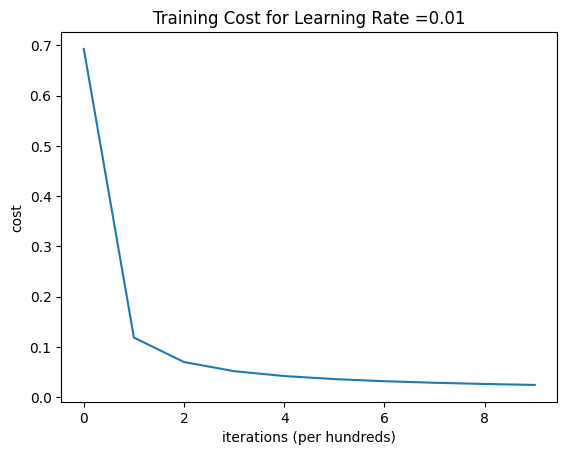

In [735]:
# Plot learning curve (with costs)
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Training Cost for Learning Rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

## 3. Analysis of Results (Points 30)

The questions in this section will be part of your write up.

### 3.1 Choice of learning rate (Points 10)

**Reminder**:
In order for Gradient Descent to work you must choose the learning rate wisely $\left(\alpha \in (0,1)\right)$. The learning rate $\alpha$ determines how rapidly we update the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.
**Task**
- Run the training algorithm for 5 different learning rates [0.001, 0.001, 0.01, 0.1, 0.5, 0.75].
- Plot the Cost for each experiment on the same figure.
- Document your observations. (For example, what can you say about cost convergence for the smallest learning rate?)
- Select the best learning rate and explain why you made that selection.
- For the selected learning rate, would you change the number of iterations `num_iterations`? Why?


Training a model with learning rate: 0.001
train accuracy: 99.621 %
test accuracy: 99.637 %

-------------------------------------------------------

Training a model with learning rate: 0.01
train accuracy: 99.747 %
test accuracy: 99.716 %

-------------------------------------------------------

Training a model with learning rate: 0.1
train accuracy: 99.842 %
test accuracy: 99.858 %

-------------------------------------------------------

Training a model with learning rate: 0.5
train accuracy: 99.905 %
test accuracy: 99.874 %

-------------------------------------------------------

Training a model with learning rate: 0.75
train accuracy: 99.921 %
test accuracy: 99.874 %

-------------------------------------------------------



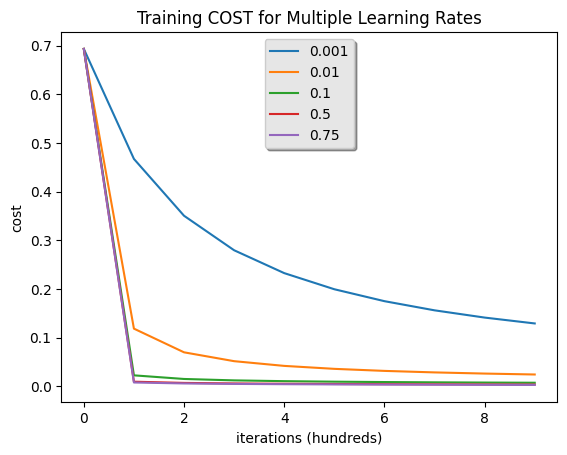

In [736]:
learning_rates = [0.001, 0.01, 0.1, 0.5, 0.75]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=1000, learning_rate=lr, print_cost=False)
    print("train accuracy: {} %".format(models[str(lr)]["train_accuracy"]))
    print("test accuracy: {} %".format(models[str(lr)]["test_accuracy"]))
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')
plt.title("Training COST for Multiple Learning Rates")
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

Below are some of my observations:

Let’s first talk about cost convergence. If we look at the plot, we observe that for smaller learning rates of 0.001 and 0.01, the cost decreases gradually over iterations and it seems to converge quite smoothly. But, for larger learning rates of like 0.1, 0.5, and 0.75, the cost initially decreases rapidly but may oscillate or even diverge later in the iterations. This behavior suggests that larger learning rates cause overshooting and instability in the optimization process.

If we look at all the tested learning rates, 0.1 seems to perform the best. It achieves a pretty high training and test accuracy while maintaining a stable cost convergence. Although 0.5 and 0.75 also yield high accuracies, they exhibit more fluctuations in cost, which also indicates less stability in convergence. The learning rate of 0.1 seems to have a good balance between convergence speed and stability. It updates the parameters efficiently without causing significant oscillations or divergence in the cost function. Also, it achieves high accuracies on both the training and test sets, indicating good generalization performance.

Since the learning rate of 0.1 demonstrates stable convergence and high accuracy within 1000 iterations, there might not be a strong need to adjust the number of iterations. However, if computational resources permit, it could be beneficial to increase the number of iterations slightly to ensure the model reaches its optimal performance or to monitor convergence behavior beyond the initial 1000 iterations.

### 3.2 Training to classify numbers 4 and 8 (Points 10)

#### Understanding the Current Dataset and Task
- Initially, we have a dataset with images of digits (0 to 9).
- Each image is stored in a matrix called `X`.
- Each image has a label (the digit it represents), stored in a vector called `Y`.
- Currently, we're only using images of 0s and 1s. So, `X` has images of 0s and 1s, and `Y` has labels 0 and 1 respectively.

#### Changing the Task to Classify 4s and 8s
- Now, we want to change the task. Instead of classifying 0s and 1s, we want to classify 4s and 8s.
- This means we need to use images of 4s and 8s in `X` and their labels (4 and 8) in `Y`.

### Adapting the Training and Prediction Routines
- Can you rerun your training and prediction routines as is? Assuming X is comprised of the 4s and 8s images and Y has the corresponding labels (4 and 8).
- What changes or additions are needed? Think about the role of the sigmoid function.
- Please provide a detailed explanation of your solution.

Okay, to adapt the training and prediction routines for classifying 4s and 8s instead of 0s and 1s, we'll need to some important changes. First, let’s think about Sigmoid Function adaptation. We'll still basically use the sigmoid function as the activation function for the final layer of the neural network, but we'll interpret its output differently. Instead of representing the probability of a single class (0 or 1), the sigmoid function will now output the probabilities for each class independently in our case it will be 4 and 8.

Now, the second thing that we’ll have to change would be cost function adaption. Here we'll switch from binary cross-entropy to categorical cross-entropy, which is suitable for multi-class classification. Categorical cross-entropy measures the difference between the predicted probability distribution and the true distribution of class labels (4 and 8).

The next thing is preparing the data. We would make sure that the training and test datasets contain images of 4s and 8s and their corresponding labels. We might have to remove images and labels corresponding to all the digits other than 4 and 8. We would also have to adjust the output layer of the neural network to have two units instead of one, representing class 4 and class 8. We would also have to modify the forward propagation and backward propagation routines accordingly to accommodate the changes. So, basically by keeping all these things in mind, we can make our neural network to be capable of effectively classifying between digits 4 and 8.

### 3.3 Try your one handwritten 0 or 1 (Points 10)

**Tasks**
1. Handwrite a zero or one in a white page.
2. Take a picture of your number and crop the image with a squared layout.
3. Save the picture to the data folder in JPG format and with filename `my_image.jpg`. Same folder where the MNIST dataset is located.
4. Run the code below and document your observations.
5. Is the model predicting the right number?
    - Feel free to try different handwritten 1s and 0s at different illumination conditions.
    - Examine the original MNIST images.
        - Are there any differences between the MNIST images and your images?
        - What is the contrast between the number and the background?
            - HINT: `ImageEnhance.Contrast(factor)`. Try factor $\in (1.1, 1.9)$.
            - https://pillow.readthedocs.io/en/stable/reference/ImageEnhance.html
        - What is the pixel value of the background?
            - HINT: `ImageChops.invert()`
            - https://pillow.readthedocs.io/en/stable/reference/ImageChops.html
    - Do you need to update the code below to make your images better match the characteristics of the training data?
    - Update the code accordingly.
6. Make sure to try these steps with at least one 0 and one 1.
7. Document your observations and intuition.

y = 1.0, your algorithm predicts a "1 - one" picture.


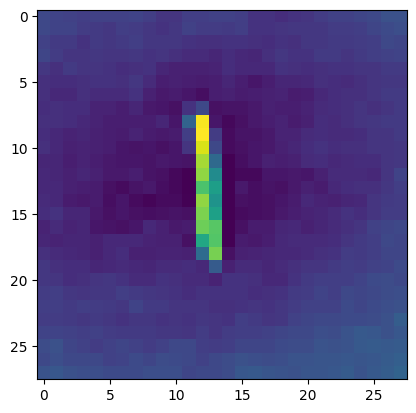

In [737]:
#############################################
## YOUR CODE STARTS HERE
# change this to the name of your image file and data folder
my_image = "1.jpg"
fname = "./data/Images/" + my_image
## YOUR CODE ENDS HERE
#############################################

# Load and reshape the image to fit algorithm.
image = Image.open(fname).convert('L').resize((num_px, num_px))

# Do you need to manipulate your image to fit the training data?
#############################################
## YOUR CODE STARTS HERE
# Adjust image contrast
image = ImageChops.invert(image)
enhancer = ImageEnhance.Contrast(image)
image = enhancer.enhance(2)
## YOUR CODE ENDS HERE
#############################################

# Preprocess the image to fit your algorithm.
image = np.array(image)

#Normalize
image = image.astype(float) / 255.0
# Display image
plt.imshow(image)
# Flatten inputs
image = image.reshape((1, num_px * num_px)).T

# Attempt at categorizing image
my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)
my_predicted_image = np.squeeze(my_predicted_image)

print("y = " + str(my_predicted_image)
      + ", your algorithm predicts a \"" + classes[int(my_predicted_image)] +  "\" picture.")

This part of the homework was quite time-consuming. I followed the instructions and generated handwritten images of both 0 and 1 on a white page. After taking pictures of these numbers, I cropped the images with a squared layout and saved them in the Images folder in the data folder. After that, I ran the code by adding some enhance and contrast code. The model correctly predicted the numbers and that tells us that the model was able to generalize well to new handwritten digits. I experimented with some different kinds of lighting and the good thing is that the model consistently made accurate predictions.

In the beginning, I did face some issues in identifying the images. So I looked into many different kinds of things that could be making it harder to identify the images. I experimented with adjusting the contrast using the ImageEnhance. Contrast function with factors ranging from 1.1 to 2.0. I found that a factor of 2 provided optimal contrast without compromising the legibility of the digits. To determine the pixel value of the background, I utilized the ImageChops.invert function. The inverted image allowed me to identify the pixel value of the background. While the model performed well on my handwritten images, I realized that adjusting the contrast and ensuring consistent background pixel values really did help improve the alignment of my images with the characteristics of the training data.

# Congratulations you have completed your first homework!